# Introduction

## 1. What is Machine Learning?

Two example of the ways people have tried to define the notion of Machine Learning:

> **Machine Learning:** Field of study that gives computers the ability to learn without being explicitly coded (Arthur Samuel, 1959).

This is an informal and old definition. A more recent and formal definition is:

> **Well-posed Learning Problem:** A computer program is said to *learn* from experience $E$ with respect to some task $T$ and some performance measure $P$, if its performance on $T$, as measured by $P$, improves with experience $E$ (Tom Mitchell, 1998).

For example, consider an email service (such as Gmail) that watches which emails you do or do not mark as spam, and based on that **learns how to better filter spam**. In this scenario:

- the task $T$ is classifying emails as spam/not spam;
- the experience $E$ is watching you label emails as spam/not spam;
- a performance measure $P$ could be the fraction of emails correctly classified as spam/not spam.

In this course, we will study several types of learning algorithms. The main two types are:

- Supervised learning, and
- Unsupervised learning.

## 2. Supervised Learning

### Example 1

Let's assume that we have collected some house prices and their size, and when we plot the data set it looks like the following figure:

In [25]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

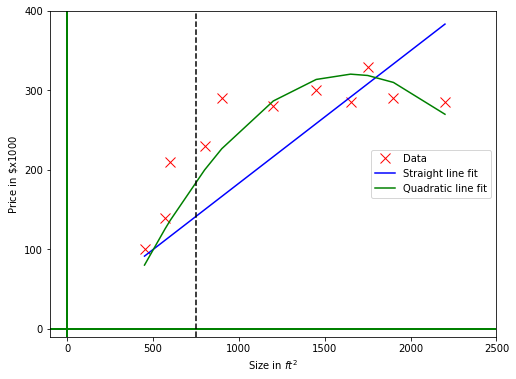

In [26]:
# Draw data and simple regression fits
plt.figure(figsize=(8, 6))
x_num = np.array([450, 570, 600, 800, 900, 1200, 1450, 1650, 1750, 1900, 2200])
y_num = np.array([100, 140, 210, 230, 290, 280, 300, 285, 330, 290, 285])
plt.plot(x_num, y_num, 'rx', ms=10, label='Data')
y_straight = 1/6 * (x_num - 500) + 100
plt.plot(x_num, y_straight, 'b', label='Straight line fit')
y_parabola = -1 / 6000 * x_num**2 + 11 / 20 * x_num - 400 / 3
plt.plot(x_num, y_parabola, 'g', label='Quadratic line fit')
plt.xticks([0, 500, 1000, 1500, 2000, 2500])
plt.yticks([0, 100, 200, 300, 400])
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.axvline(x=750, c='k', ls='--')
plt.axis([-100, 2500, -10, 400])
plt.xlabel('Size in $ft^2$')
plt.ylabel('Price in $\$$x1000')
plt.legend(loc='best')

Also, let's assume that some friend wants to sell his $750$ $ft^2$ house, and he wants to know how much he can get for the house.

- A learning algorithm may fit a straight line to the data (such as the blue line).
  - Based on that, it looks like his house can be sold at $\$140.000$.
  
- Other learning algorithm may fit a quadratic line to the data (such as the green line).
  - Based on that, it looks like his house can be sold at $\$185.000$.

We will see later if we want to fit a square or a straight line to the data.

> This is an example of **supervised learning**, because we gave the algorithm a data set in which the *right answers* were given.

> This particular example was a **regression problem**, since we wanted to predict a continuous real valued output (price).

### Example 2

Let's assume we have access to some medical records regarding breast cancer tumors. These records contain data about the tumor sizes and if the cancer is malignant or benign.

What we want to predict is, given a tumor size, predict if it is malignant or benign.

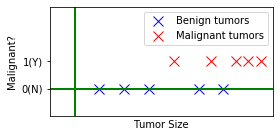

In [11]:
# Draw cancer data
plt.figure(figsize=(4, 2))
x_b = np.array([1, 2, 3, 5, 6])
x_m = np.array([4, 5.5, 6.5, 7, 7.5])
y_b = np.array([0, 0, 0, 0, 0])
y_m = np.array([1, 1, 1, 1, 1])
plt.plot(x_b, y_b, 'bx', ms=10, label='Benign tumors')
plt.plot(x_m, y_m, 'rx', ms=10, label='Malignant tumors')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks([0, 1], ['0(N)', '1(Y)'])
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.axis([-1, 8, -1, 3])
plt.xlabel('Tumor Size')
plt.ylabel('Malignant?')
plt.legend(loc='best')

Now, let's say that some woman has breast cancer, unfortunately, and we know the size of her breast tumor. The machine learning question is: Can you estimate what is the probability that the tumor is malignat vs. benign?

> This particular example is a **classification problem**, referring to the fact that we are trying to predict a discrete value output (zero-benign or one-malignant).

In classification problems, we can have more than two possible values for the output (three types of breast cancers, for example).

In this type of problems, we can plot the data in a different way, given that there are finite (often a small set) possible values for the discrete output.

For instance, let's say that the medical records of the example above, also included the age of the patient. In that case, the data would look like:

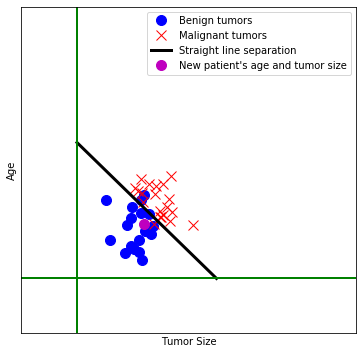

In [40]:
# Draw cancer data
plt.figure(figsize=(6, 6))
n = 20
x_b = 1 * np.ones(n) + np.random.normal(0, 0.3, n)
x_m = 1.5 * np.ones(n) + np.random.normal(0, 0.3, n)
y_b = 1 * np.ones(n) + np.random.normal(0, 0.3, n)
y_m = 1.5 * np.ones(n) + np.random.normal(0, 0.3, n)
plt.plot(x_b, y_b, 'bo', ms=10, label='Benign tumors')
plt.plot(x_m, y_m, 'rx', ms=10, label='Malignant tumors')
x_num = np.linspace(0, 2.5)
y_num = -x_num + 2.5
plt.plot(x_num, y_num, 'k', lw=3, label='Straight line separation')
plt.plot(1.2, 1, 'om', ms=10, label="New patient's age and tumor size")
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labeltop=False,
    labelleft=False,
    labelright=False)
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.axis([-1, 5, -1, 5])
plt.xlabel('Tumor Size')
plt.ylabel('Age')
plt.legend(loc='best')

In this sense, the learning algorithm may decide to fit a straight line (black line) to try to separate the benign tumors and the malignant tumors. 

Let's say a friend has a tumor, unfortunately. Our friend's age and tumor size are represented by the pink dot. This learning algorithm will say that our friend's tumor falls on the benign side, so it is more likely to be benign than malignant.

Thus, we conclude that there are mainly two types of supervised learning problems:

- Regression problems: Problems whose output, that we are trying to predict, *can be treated* as a continuous real value.

- Classification problems: Problems whose output, that we are trying to predict, is a discrete value.

## 3. Unsupervised Learning

For each example in supervised learning, we are given "the right answer".

In contrast, in **unsupervised learning**, the data we are given looks as follows:

Text(0, 0.5, '$x_2$')

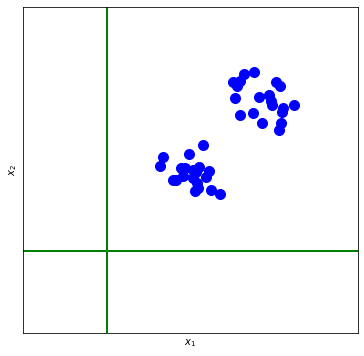

In [44]:
# Draw data
plt.figure(figsize=(6, 6))
n = 20
x_b = 1 * np.ones(n) + np.random.normal(0, 0.2, n)
x_m = 1.9 * np.ones(n) + np.random.normal(0, 0.2, n)
y_b = 1 * np.ones(n) + np.random.normal(0, 0.2, n)
y_m = 1.9 * np.ones(n) + np.random.normal(0, 0.2, n)
plt.plot(x_b, y_b, 'bo', ms=10)
plt.plot(x_m, y_m, 'bo', ms=10)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labeltop=False,
    labelleft=False,
    labelright=False)
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.axis([-1, 3, -1, 3])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

... **without including any labels at all**.

The learning question here is: Can you find some structure in the data?

Given the above data set, an unsupervised learning algorithm may decide that the data lives in two different clusters:

In [46]:
from matplotlib.patches import Ellipse

Text(0, 0.5, '$x_2$')

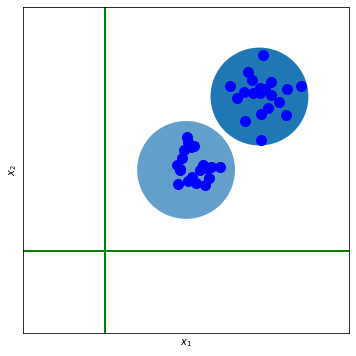

In [52]:
# Draw data
fig = plt.figure(figsize=(6, 6))
# Clusters
e1 = Ellipse(xy=[1, 1], width=1.2, height=1.2, angle=0)
e2 = Ellipse(xy=[1.9, 1.9], width=1.2, height=1.2, angle=0)
ax = fig.add_subplot(111, aspect='equal')
ax.add_artist(e1)
ax.add_artist(e2)
e1.set_alpha(0.5)
e1.set_alpha(0.7)
n = 20
x_b = 1 * np.ones(n) + np.random.normal(0, 0.2, n)
x_m = 1.9 * np.ones(n) + np.random.normal(0, 0.2, n)
y_b = 1 * np.ones(n) + np.random.normal(0, 0.2, n)
y_m = 1.9 * np.ones(n) + np.random.normal(0, 0.2, n)
plt.plot(x_b, y_b, 'bo', ms=10)
plt.plot(x_m, y_m, 'bo', ms=10)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labeltop=False,
    labelleft=False,
    labelright=False)
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.axis([-1, 3, -1, 3])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

> This particular example is a **clustering algorithm**.

We see this type of algorithms in many things in our daily living. For instance:

- Any news searcher (such as Google news), separates the news into similar categories.

- In social network analysis, given the data of some people we can determine cohesive groups of friends.

- In market segmentation, we want to automatically group the customers into different market segments to apply ad hoc publicity campaigns.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez. Based on the content of the Machine Learning course offered through coursera by Prof. Andrew Ng.
</footer>